---

## <center> ★ International School of AI & Data Science Internship Task - Credit Card Fraud Detection ★
## <center> ***Domain: Finance***

---

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project-Credit-Card-Fraud-Detection/main/credit_card.jpeg" style="width: 700px;"/>

## Contact Information

- **Name** - Azizullah Ali
- **Phone** - +91-8795134296
- **Email** - azizullaha949@gmail.com
- **Portfolio** -https://github.com/azizullaha

---

### Description:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Data for the case is available in CSV format having 6362620 rows and 10 columns.

It contains both Categorical and numerical input variables. 

From the Data Dictionary we Know that

- **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- **amount** - amount of the transaction in local currency.

- **nameOrig** - customer who started the transaction

- **oldbalanceOrg** - initial balance before the transaction

- **newbalanceOrig** - new balance after the transaction

- **nameDest** - customer who is the recipient of the transaction

- **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.



### Objective:
- Understand the Dataset & cleanup.
- Build classification model to predict weather the the transaction is fraudulent or not.
- Also fine-tune the hyperparameters & compare the evaluation metrics of vaious classification algorithms.

---

## <center> Stractegic Plan of Action:

**I aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

## <center>1. Data Exploration

In [1]:
from tqdm import tqdm
#used for creating Progress Meters or Progress Bars

import os
#importing operating system module

import math
#for mathematical calculation

import scipy
import random

import numpy as np
# for Numerical Operation and handling complex arrays

import pandas as pd
# for data processing

import seaborn as sns
#  build on top of matplotlib

from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display


from sklearn.decomposition import PCA 
#for data reduction 

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
#for splitting data into train and test

from imblearn.under_sampling import OneSidedSelection
from scikitplot.metrics import plot_roc_curve as auc_roc
from imblearn.under_sampling import CondensedNearestNeighbour
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset

df = pd.read_csv('Fraud.csv')


print('\n\033[1mDescription:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))
df.head()


Description: The Datset consists of 11 features & 6362620 samples.


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df=df.drop(columns=['nameOrig','nameDest'])

In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [5]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

isFraud                 2
isFlaggedFraud          2
type                    5
step                  743
oldbalanceOrg     1845844
newbalanceOrig    2682586
newbalanceDest    3555499
oldbalanceDest    3614697
amount            5316900
dtype: int64

In [6]:
#Checking number of unique rows in each feature

nu = df.nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mDescription:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Description: The Dataset has 6 numerical & 3 categorical features.


In [7]:
#Checking the stats of all the columns

display(df.describe())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


---

## <center> 2. Exploratory Data Analysis (EDA)

            Target Variable Distribution           


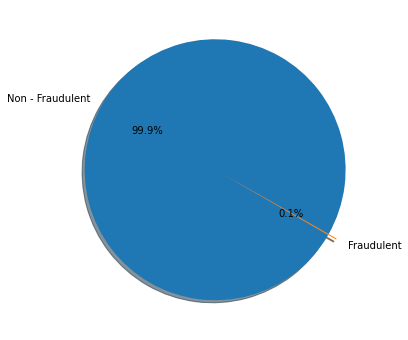

In [8]:
#Let us first analyze the distribution of the target variable
labels = ['Non - Fraudulent','Fraudulent']
MAP={}
for e, i in enumerate(df['isFraud'].unique()):
    MAP[i]=labels[e]

df1 = df.copy()
df1['isFraud']=df1['isFraud'].map(MAP)
explode=np.zeros(len(labels))
explode[-1]=0.07
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(df1['isFraud'].value_counts(), labels=df1['isFraud'].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=-30)
plt.show()

**Inference:** The Target Variable seems to be slightly imbalanced! Hence we shall try to perform data augmentation.

                                 Visualising Data Imbalancing:                                  


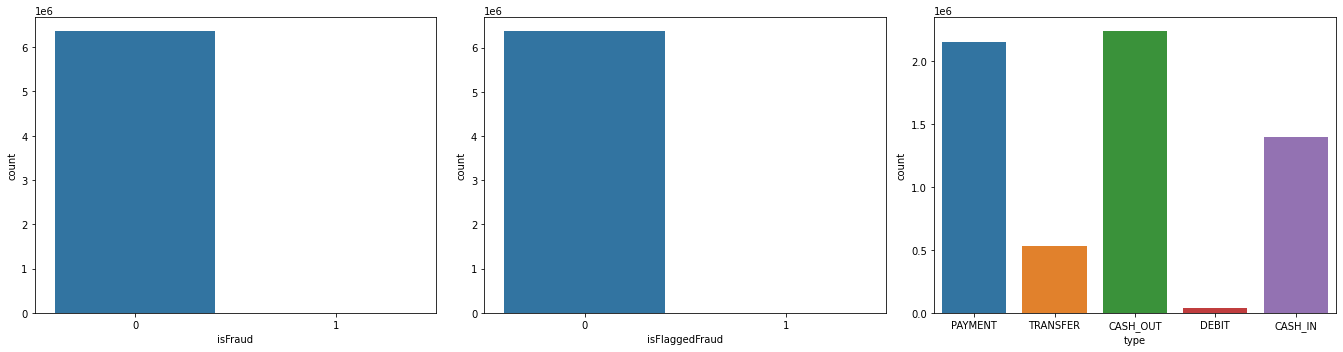

In [9]:
#Visualising Data Imbalancing

print('\033[1mVisualising Data Imbalancing:'.center(100))

n=4
plt.figure(figsize=[25,5*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=15:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
plt.tight_layout()
plt.show()

**Inference:** Visualizing the categorical features reveal lot of information about the dataset.

                                     Features Distribution                                      


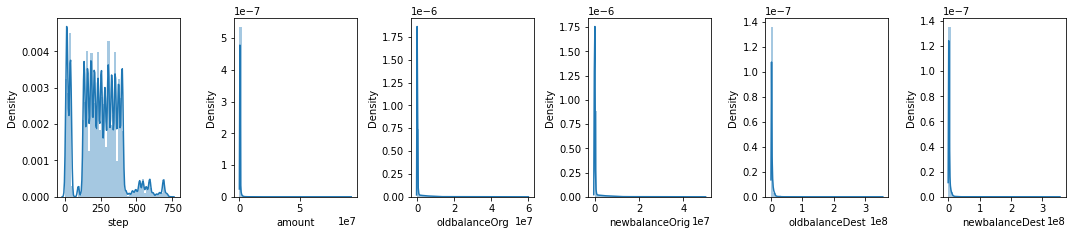

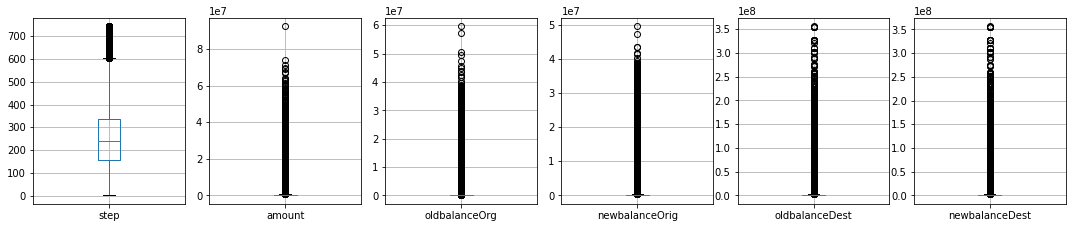

Wall time: 4min 19s


In [10]:
%%time
print('\033[1mFeatures Distribution'.center(100))

n=6
nf = [i for i in df.columns if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(df.columns)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(df.columns)/n),n,c+1)
    sns.distplot(df[nf[c]])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3*math.ceil(len(df.columns)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(df.columns)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

---

## <center> 3. Data Preprocessing

In [11]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

                Total Null Values  Percentage
step                            0         0.0
type                            0         0.0
amount                          0         0.0
oldbalanceOrg                   0         0.0
newbalanceOrig                  0         0.0
oldbalanceDest                  0         0.0
newbalanceDest                  0         0.0
isFraud                         0         0.0
isFlaggedFraud                  0         0.0

Inference: The dataset doesn't have any null elements


In [12]:
#Removal of any Duplicate rows (if any)

counter = 0
r,c = df.shape

df1 = df.copy()
df1.drop_duplicates(inplace=True)
df1.reset_index(drop=True,inplace=True)

if df1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-df1.shape[0]}')


Inference: Number of duplicates dropped ---> 543


In [13]:
#Converting categorical Columns to Numeric

df1 = df.copy()

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df1[i].nunique()==2:
        if oh==True: print("One-Hot Encoding on features:")
        print(i);oh=False
        df1[i]=pd.get_dummies(df1[i], drop_first=True, prefix=str(i))
    if (df1[i].nunique()>2 and df1[i].nunique()<15):
        if dm==True: print("\nDummy Encoding on features:")
        print(i);dm=False
        df1 = pd.concat([df1.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df1[i], drop_first=True, prefix=str(i)))],axis=1)

One-Hot Encoding on features:
isFraud
isFlaggedFraud

Dummy Encoding on features:
type


In [14]:
#Removal of outlier:

df3 = df1.copy()

for i in [i for i in df3.columns]:
    if df3[i].nunique()>=12:
        Q1 = df3[i].quantile(0.0001)
        Q3 = df3[i].quantile(0.9999)
        IQR = Q3 - Q1
        df3 = df3[df3[i] <= (Q3+(1.5*IQR))]
        df3 = df3[df3[i] >= (Q1-(1.5*IQR))]
df3 = df3.reset_index(drop=True)
display(df3.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(df1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df3.shape[0]))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0



Inference: Before removal of outliers, The dataset had 6362620 samples.
Inference: After removal of outliers, The dataset now has 6362575 samples.


In [15]:
df3.isFraud.value_counts()

0    6354362
1       8213
Name: isFraud, dtype: int64

In [16]:
#Fixing the imbalance using SMOTE Technique

df4 = df3.copy()
target ='isFraud'

print('Original class distribution:')
print(df4[target].value_counts())

df5_1 = df4[df4.isFraud==1]
df5_0 = df4[df4.isFraud==0]

df5_0=df5_0.loc[random.choices(df5_0.index.values,k=2000)]

df5 = pd.concat([df5_0,df5_1],axis=0)

print('\nClass distribution after applying SMOTE Technique:',)
print(df5[target].value_counts())

Original class distribution:
0    6354362
1       8213
Name: isFraud, dtype: int64

Class distribution after applying SMOTE Technique:
1    8213
0    2000
Name: isFraud, dtype: int64


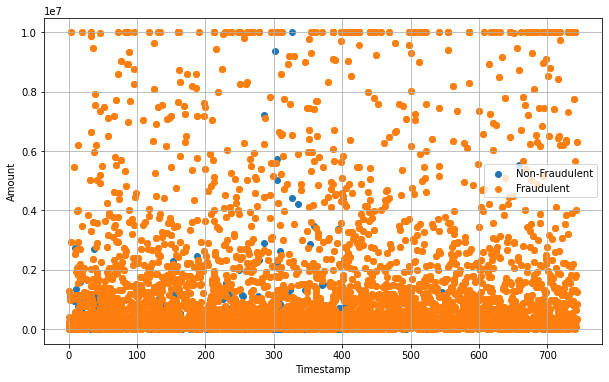

In [17]:
#Visualising the Fraudulent Transactions for various amounts across timstamps after undersampling

plt.scatter(df5[df5.isFraud==0]['step'], df5[df5.isFraud==0]['amount'], label='Non-Fraudulent')
plt.scatter(df5[df5.isFraud==1]['step'], df5[df5.isFraud==1]['amount'], label='Fraudulent')
plt.xlabel('Timestamp')
plt.ylabel('Amount')
plt.grid()
plt.legend()
plt.show()

---

## <center> 4. Data Manipulation

In [18]:
#Splitting the data intro training & testing sets

df = df5.copy()
df.reset_index(inplace=True, drop=True)

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (10213, 11) (10213,) 
Training set  --->  (8170, 11) (8170,) 
Testing set   --->  (2043, 11)  (2043,)


In [19]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03,8.170000e+03
mean,1.728523e-17,-2.873059e-17,2.419865e-17,2.237228e-16,-1.635846e-16,-2.490596e-16,3.099027e-16,2.948736e-15,-1.326618e-15,9.271110e-16,-5.033373e-17
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-1.636576e+00,-5.484020e-01,-4.295758e-01,-1.440833e-01,-1.924286e-01,-3.294557e-01,-3.835295e-02,-9.486833e-01,-3.992146e-02,-2.673489e-01,-8.425678e-01
25%,-8.187704e-01,-5.113601e-01,-4.130513e-01,-1.440833e-01,-1.924286e-01,-3.294557e-01,-3.835295e-02,-9.486833e-01,-3.992146e-02,-2.673489e-01,-8.425678e-01
50%,-8.704950e-02,-4.154328e-01,-3.454153e-01,-1.440833e-01,-1.924286e-01,-3.154114e-01,-3.835295e-02,-9.486833e-01,-3.992146e-02,-2.673489e-01,-8.425678e-01
75%,8.168410e-01,-3.510310e-02,-6.353909e-02,-1.440833e-01,-1.091264e-01,-4.628960e-02,-3.835295e-02,1.054093e+00,-3.992146e-02,-2.673489e-01,1.186848e+00
max,1.912031e+00,3.931395e+00,1.673625e+01,2.230133e+01,6.946012e+01,6.046291e+01,2.607361e+01,1.054093e+00,2.504918e+01,3.740431e+00,1.186848e+00



                                Standardardization on Testing set                                


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,0.023966,-0.012862,-0.019973,-0.019844,0.007955,-0.005036,0.012772,-0.012486,-0.003080,-0.029982,0.032574
std,1.007785,0.986577,0.927970,0.889369,0.699172,0.766659,1.154559,0.999508,0.960946,0.946262,1.005310
min,-1.636576,-0.548402,-0.429576,-0.144083,-0.192429,-0.329456,-0.038353,-0.948683,-0.039921,-0.267349,-0.842568
25%,-0.778119,-0.507715,-0.412184,-0.144083,-0.192429,-0.329456,-0.038353,-0.948683,-0.039921,-0.267349,-0.842568
50%,-0.058355,-0.404680,-0.336642,-0.144083,-0.192429,-0.318801,-0.038353,-0.948683,-0.039921,-0.267349,-0.842568
75%,0.855101,-0.070475,-0.080948,-0.144083,-0.116775,-0.074549,-0.038353,1.054093,-0.039921,-0.267349,1.186848
max,1.912031,3.931395,14.089864,18.143154,10.508449,9.182920,26.073614,1.054093,25.049182,3.740431,1.186848


---

## <center> 5. Feature Selection/Extraction

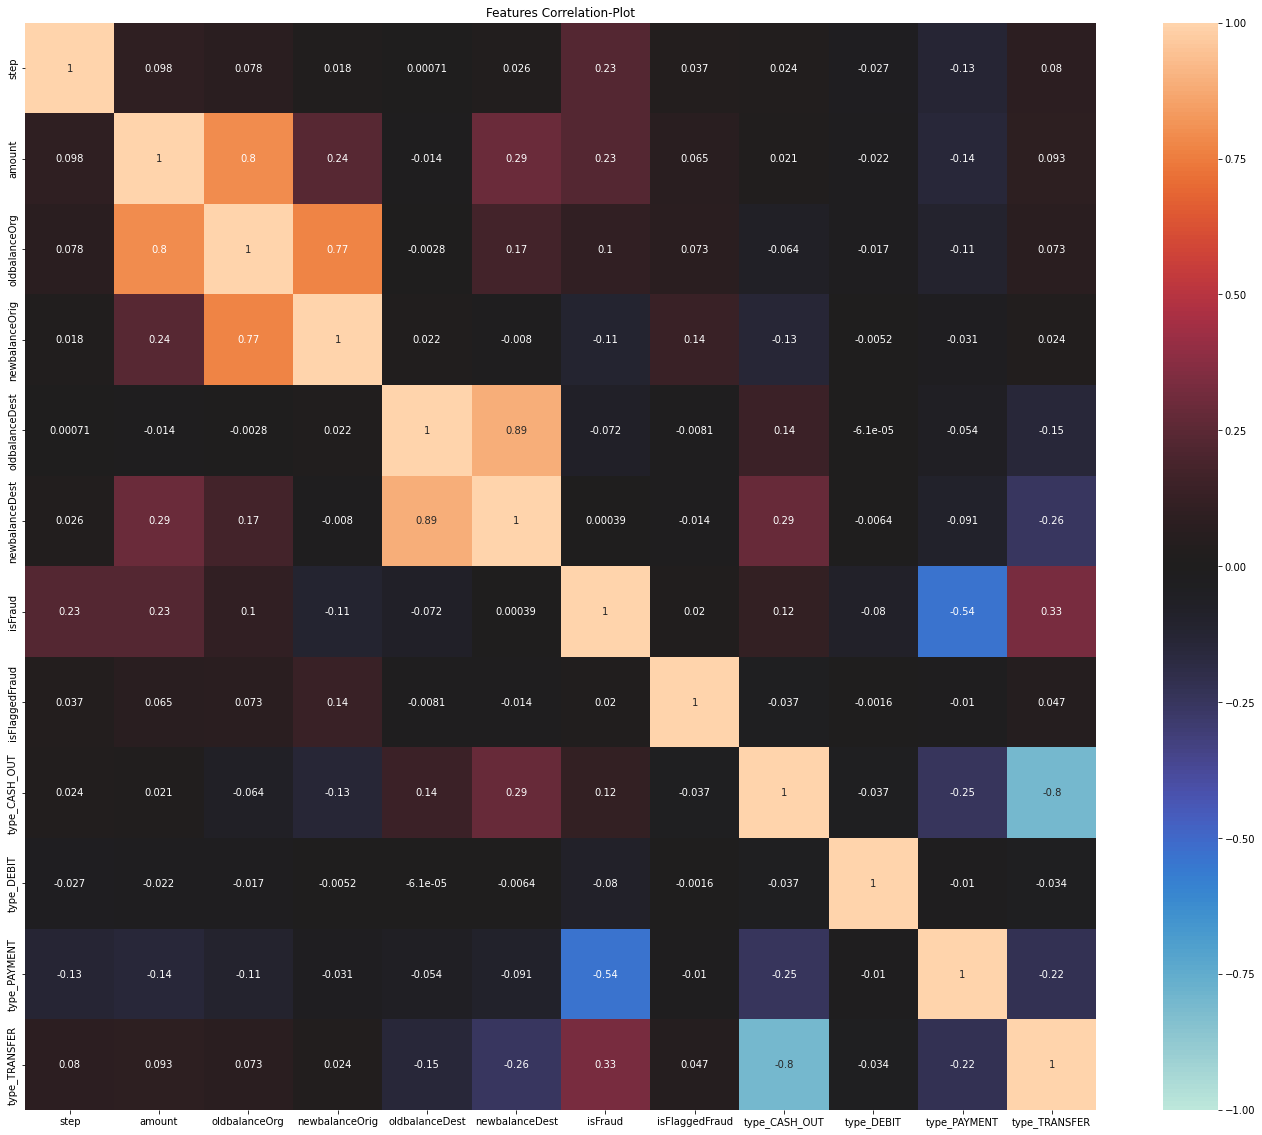

In [20]:
#Checking the correlation

features = df.columns
plt.figure(figsize=[24,20])
plt.title('Features Correlation-Plot')
sns.heatmap(df[features].corr(), vmin=-1, vmax=1, center=0, annot=True) #, 
plt.show()

## <center> 6. Predictive Modeling

In [21]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((7,5)), columns=['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']
Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [22]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(Test_Y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(Test_Y, pred),3)*100 #, average='weighted'
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(Test_Y, pred_prob[:, 1]),3)*100 #, multi_class='ovr'
    print('{}{}\033[1m Evaluating {} \033[0m{}{}\n'.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred),3)*100)) #, average='weighted'
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))
    
    auc_roc(Test_Y, pred_prob, curves=['each_class'])
    plt.show()

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):    
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2))) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

---

## 1. Logistic Regression:

<<<----------------------------------- Evaluating Logistic Regression (LR) ----------------------------------->>>

Accuracy = 92.5%
F1 Score = 95.6%

 Confusiton Matrix:
 [[ 233  151]
 [   3 1656]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.75       384
           1       0.92      1.00      0.96      1659

    accuracy                           0.92      2043
   macro avg       0.95      0.80      0.85      2043
weighted avg       0.93      0.92      0.92      2043



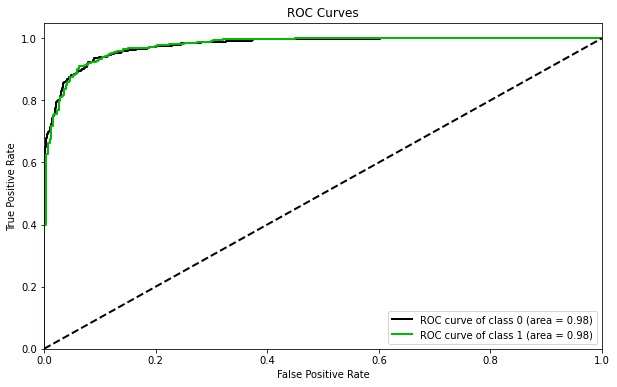


Interpreting the Output of Logistic Regression:

intercept  3.6244000483472782
classes [0 1]


,coeff
step,0.542380
amount,-3.547006
oldbalanceOrg,15.104774
newbalanceOrig,-9.594696
oldbalanceDest,2.337752
newbalanceDest,-2.816004
isFlaggedFraud,0.652598
type_CASH_OUT,2.633899
type_DEBIT,-0.184766
type_PAYMENT,-1.220909


In [23]:
# Building Logistic Regression Classifier

LR_model = LogisticRegression(solver='liblinear')

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(LR_model, space, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

LR = LR_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = LR.predict(Test_X_std)
pred_prob = LR.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,0)

print('\n\033[1mInterpreting the Output of Logistic Regression:\n\033[0m')

print('intercept ', LR.intercept_[0])
print('classes', LR.classes_)
display(pd.DataFrame({'coeff': LR.coef_[0]}, index=Train_X_std.columns))

---

## 2. Decisoin Tree Classfier:

<<<----------------------------------- Evaluating Decision Tree Classifier (DT) ----------------------------------->>>

Accuracy = 99.0%
F1 Score = 99.4%

 Confusiton Matrix:
 [[ 371   13]
 [   7 1652]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       384
           1       0.99      1.00      0.99      1659

    accuracy                           0.99      2043
   macro avg       0.99      0.98      0.98      2043
weighted avg       0.99      0.99      0.99      2043



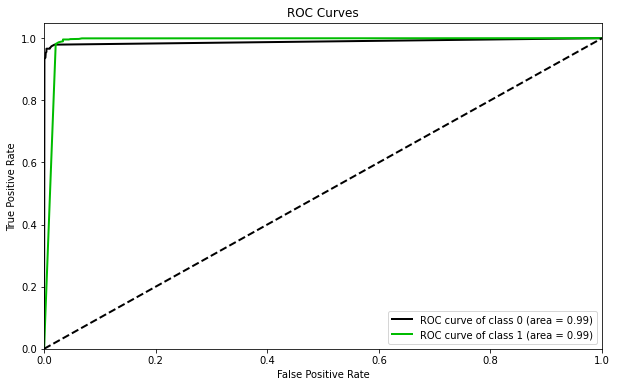


Interpreting the output of Decision Tree:



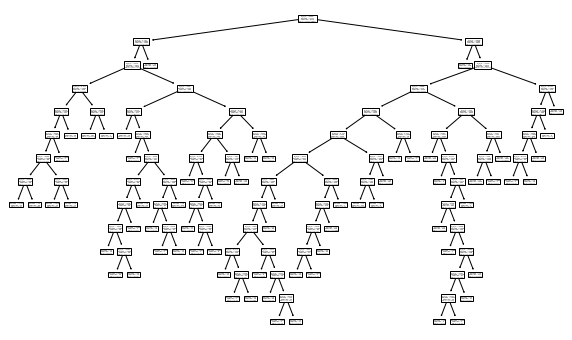

In [24]:
#Building Decision Tree Classifier

DT_model = DecisionTreeClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

DT = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = DT.predict(Test_X_std)
pred_prob = DT.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,1)

print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(DT)
plt.show()

---

## 3. Random Forest Classfier:

<<<----------------------------------- Evaluating Random Forest Classifier (RF) ----------------------------------->>>

Accuracy = 98.7%
F1 Score = 99.2%

 Confusiton Matrix:
 [[ 364   20]
 [   6 1653]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       384
           1       0.99      1.00      0.99      1659

    accuracy                           0.99      2043
   macro avg       0.99      0.97      0.98      2043
weighted avg       0.99      0.99      0.99      2043



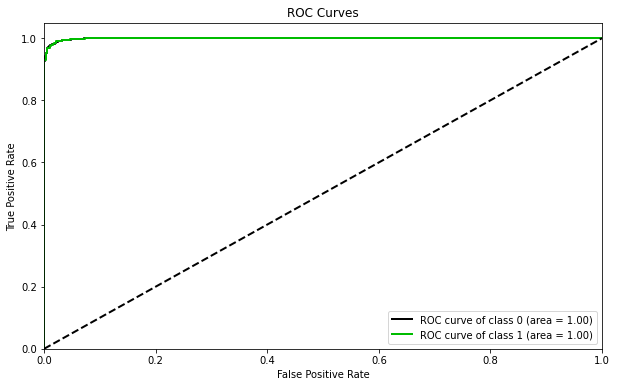


Interpreting the output of Random Forest:



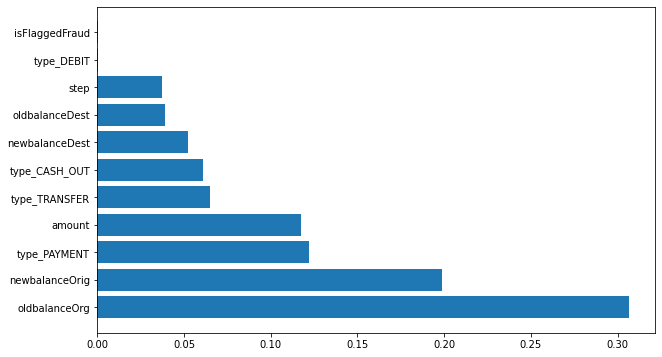

In [25]:
# Building Random-Forest Classifier

RF_model = RandomForestClassifier()

param_dist={'bootstrap': [True, False],
            'max_depth': [10, 20, 50, 100, None],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [50, 100]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(RF_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

RF = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = RF.predict(Test_X_std)
pred_prob = RF.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,2)

print('\n\033[1mInterpreting the output of Random Forest:\n\033[0m')
rfi=pd.Series(RF.feature_importances_, index=Train_X_std.columns).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

---

## 4. Naive Bayes Classfier:

<<<----------------------------------- Evaluating Naïve Bayes Classifier (NB) ----------------------------------->>>

Accuracy = 88.4%
F1 Score = 93.0%

 Confusiton Matrix:
 [[ 222  162]
 [  75 1584]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.58      0.65       384
           1       0.91      0.95      0.93      1659

    accuracy                           0.88      2043
   macro avg       0.83      0.77      0.79      2043
weighted avg       0.88      0.88      0.88      2043



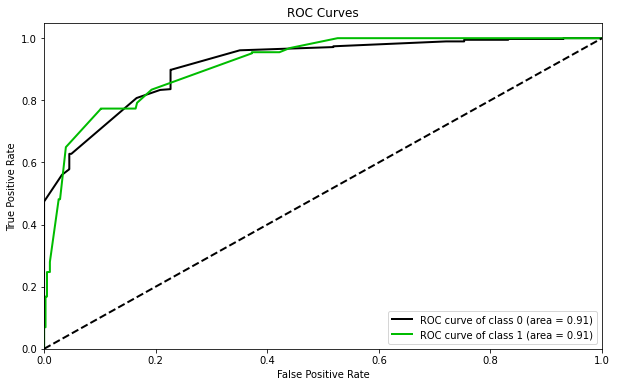

In [26]:
# Building Naive Bayes Classifier

NB_model = BernoulliNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(NB_model, params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

NB = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = NB.predict(Test_X_std)
pred_prob = NB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,3)

---

## 5. Support Vector Machine Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 96.5%
F1 Score = 97.89999999999999%

 Confusiton Matrix:
 [[ 316   68]
 [   4 1655]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90       384
           1       0.96      1.00      0.98      1659

    accuracy                           0.96      2043
   macro avg       0.97      0.91      0.94      2043
weighted avg       0.97      0.96      0.96      2043



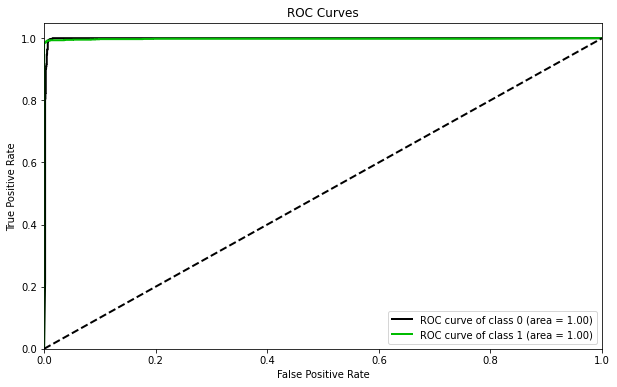

In [27]:
# Building Support Vector Machine Classifier

SVM_model = SVC(probability=True).fit(Train_X_std, Train_Y)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ["rbf"],
             "random_state": [1]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

SVM = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = SVM.predict(Test_X_std)
pred_prob = SVM.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 6. K-Nearest Neighbours Classfier:

<<<----------------------------------- Evaluating K Nearest Neighbours (KNN) ----------------------------------->>>

Accuracy = 93.89999999999999%
F1 Score = 96.3%

 Confusiton Matrix:
 [[ 280  104]
 [  21 1638]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.73      0.82       384
           1       0.94      0.99      0.96      1659

    accuracy                           0.94      2043
   macro avg       0.94      0.86      0.89      2043
weighted avg       0.94      0.94      0.94      2043



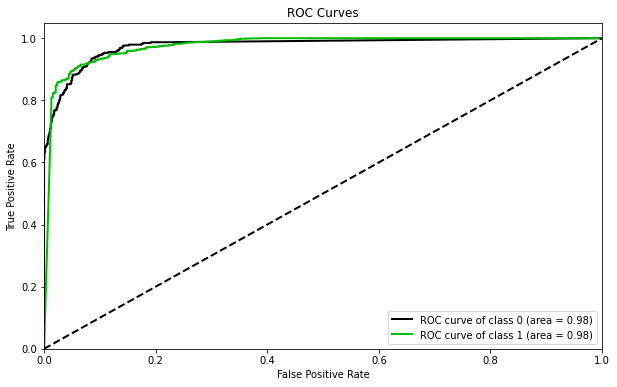

In [28]:
# Building K-Neareset Neighbours Classifier

KNN_model = KNeighborsClassifier()

knn_param = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

RCV = RandomizedSearchCV(KNN_model, knn_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

KNN = RCV.fit(Train_X_std, Train_Y).best_estimator_
pred = KNN.predict(Test_X_std)
pred_prob = KNN.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,4)

---

## 7. Gradient Boosting Classfier:

<<<----------------------------------- Evaluating Gradient Boosting (GB) ----------------------------------->>>

Accuracy = 98.9%
F1 Score = 99.3%

 Confusiton Matrix:
 [[ 367   17]
 [   5 1654]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       384
           1       0.99      1.00      0.99      1659

    accuracy                           0.99      2043
   macro avg       0.99      0.98      0.98      2043
weighted avg       0.99      0.99      0.99      2043



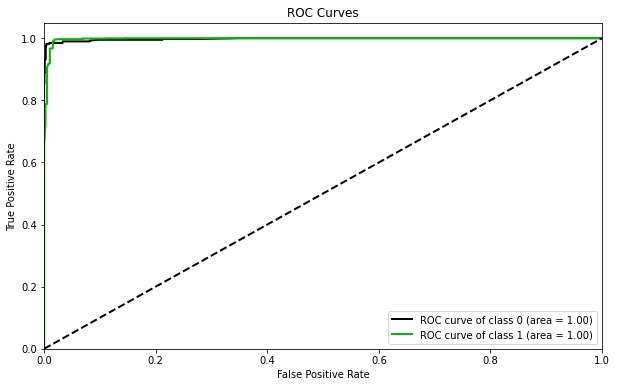

In [29]:
# Building Gradient Boosting Classifier

GB_model = GradientBoostingClassifier()#.fit(Train_X_std, Train_Y)
param_dist = {
    "n_estimators":[5,20,100,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# RCV = RandomizedSearchCV(GB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

GB = GB_model.fit(Train_X_std, Train_Y)#.best_estimator_
pred = GB.predict(Test_X_std)
pred_prob = GB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,5)

---

## 8. Extreme Gradient Boosting Classfier:

[20:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<<<----------------------------------- Evaluating Extreme Gradient Boosting (XGB) ----------------------------------->>>

Accuracy = 99.2%
F1 Score = 99.5%

 Confusiton Matrix:
 [[ 371   13]
 [   3 1656]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       384
           1       0.99      1.00      1.00      1659

    accuracy                           0.99      2043
   macro avg       0.99      0.98      0.99      2043
weighted avg       0.99      0.99      0.99      2043



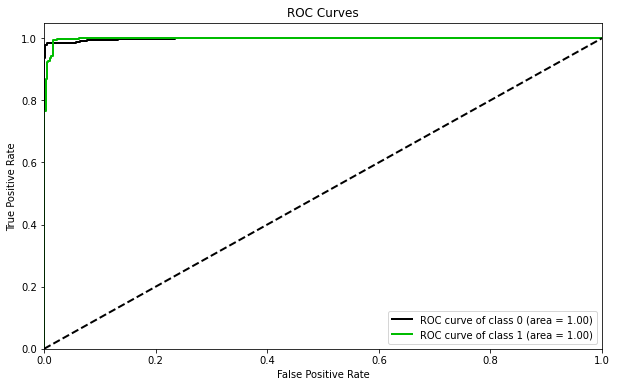

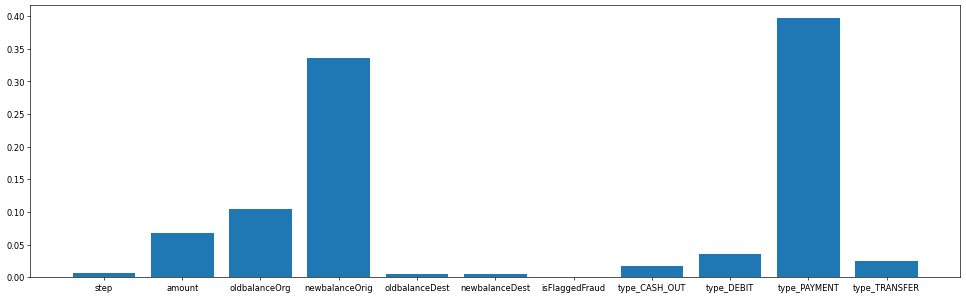

In [30]:
# Building Extreme Gradient Boosting Classifier

XGB_model = XGBClassifier()#.fit(Train_X_std, Train_Y)

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#RCV = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=5, random_state=1)

XGB = XGB_model.fit(Train_X_std, Train_Y.values)#.best_estimator_
pred = XGB.predict(Test_X_std)
pred_prob = XGB.predict_proba(Test_X_std)
Classification_Summary(pred,pred_prob,6)
figure(figsize=(20, 6), dpi=60)
plt.bar( Train_X_std.columns,XGB.feature_importances_,width=0.8)
plt.show()

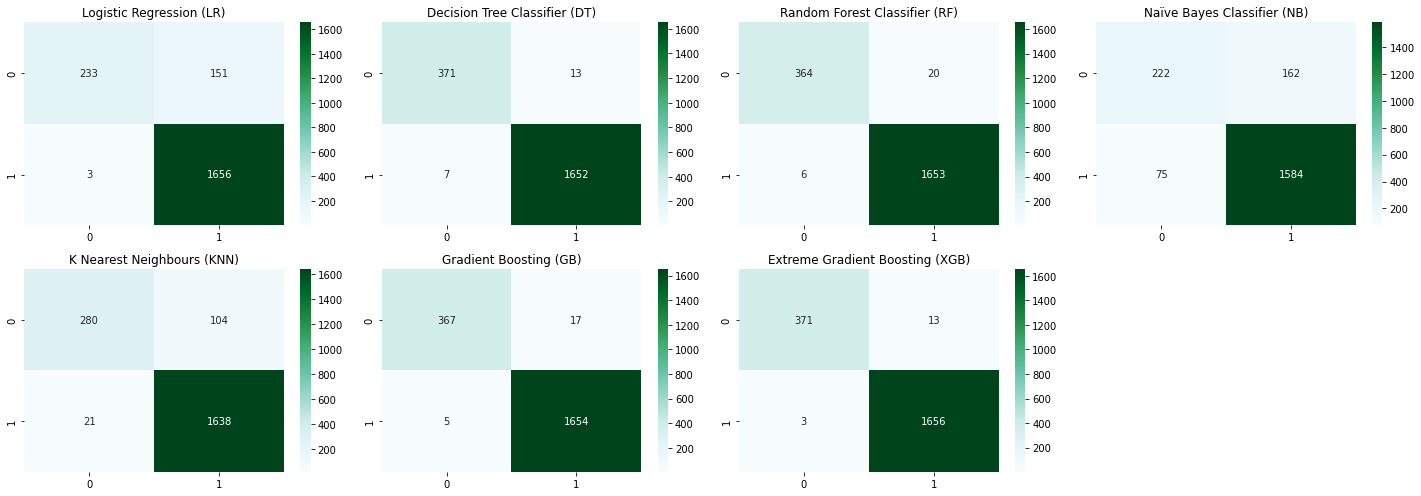

In [31]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=Tr/ue)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)/4)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='BuGn', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,KNN,GB,XGB])

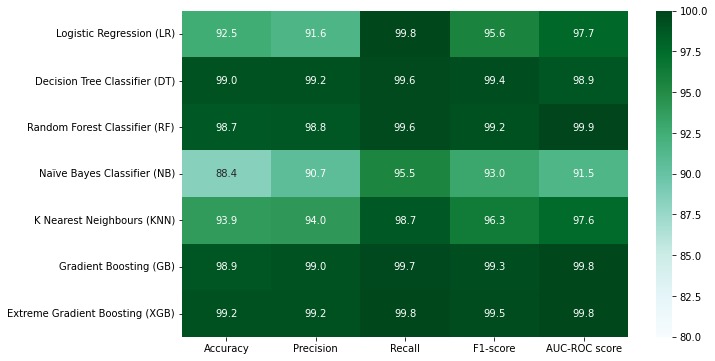

In [32]:
#Comparing all the models Scores

#plt.figure(figsize=[12,5])
sns.heatmap(Evaluation_Results, annot=True, vmin=80, vmax=100, cmap='BuGn', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the Recall score. We can note from the above heatmap that the Boosting & Ensemble Models Performed the best on the current dataset...

---